# Classificaço de Patologias usando Imagens Médicas


## Carregar imagens do diretório

In [37]:
import os
current_dir = os.path.abspath(os.getcwd())

## Converter base de dados para treino, validação e teste

In [38]:
#cria nova pasta para cachorros e gatos atendendo a estrutura do Keras/Tensorflow
folder = "/novo"
train_folder = current_dir + folder + "/train"
val_folder = current_dir + folder + "/val"
test_folder = current_dir + folder + "/test"

model_filepath = "keras/classificacao_02_06.keras"
conversao_path = "conversao/conversao_02_06"

# Fazer o Tensorflow carregar as imagens para a RNA

In [39]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

[]
2.6.1


In [40]:
from tensorflow.keras.utils import image_dataset_from_directory
#image_dataset_from_directory monta uma estrutura de dados com imagens 180x180 ajustando o peso da rede neural
# de 32 em 32 imagens
train_dataset = image_dataset_from_directory(train_folder, image_size=(180, 180), batch_size=32)

validation_dataset = image_dataset_from_directory(val_folder,image_size=(180, 180),batch_size=32)

test_dataset = image_dataset_from_directory(test_folder, image_size=(180, 180),batch_size=32)

Found 34931 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 484 files belonging to 2 classes.


In [41]:
#
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    print(data_batch[0].shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
(180, 180, 3)


# Treinando o modelo

In [42]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#cria uma arquitetura de uma rede neural profunda vazia
model = keras.Sequential()
model.add(Rescaling(scale=1.0/255))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
#model.add(Dense(4, activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath = model_filepath,
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)



Epoch 1/50
1092/1092 [==============================] - 370s 338ms/step - loss: 0.4402 - accuracy: 0.8030 - val_loss: 0.2502 - val_accuracy: 0.9375
Epoch 2/50
1092/1092 [==============================] - 354s 324ms/step - loss: 0.2940 - accuracy: 0.8835 - val_loss: 0.1336 - val_accuracy: 1.0000
Epoch 3/50
1092/1092 [==============================] - 369s 338ms/step - loss: 0.2487 - accuracy: 0.9063 - val_loss: 0.0828 - val_accuracy: 1.0000
Epoch 4/50
1092/1092 [==============================] - 349s 320ms/step - loss: 0.2083 - accuracy: 0.9243 - val_loss: 0.0422 - val_accuracy: 1.0000
Epoch 5/50
1092/1092 [==============================] - 352s 322ms/step - loss: 0.1607 - accuracy: 0.9441 - val_loss: 0.2115 - val_accuracy: 0.9375
Epoch 6/50
1092/1092 [==============================] - 362s 331ms/step - loss: 0.1108 - accuracy: 0.9624 - val_loss: 0.1343 - val_accuracy: 0.9375
Epoch 7/50
1092/1092 [==============================] - 356s 326ms/step - loss: 0.0682 - accuracy: 0.9784 - val_

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 484416)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 484417    
Total params: 503,809
Trainable params: 503,809
Non-trainable params: 0
________________________________________________

In [45]:
#https://www.tensorflow.org/js/tutorials/conversion/import_keras?hl=pt-br#alternative_use_the_python_api_to_export_directly_to_tfjs_layers_format
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, conversao_path)

# Visualização de Resultados

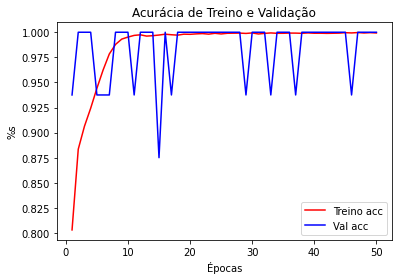

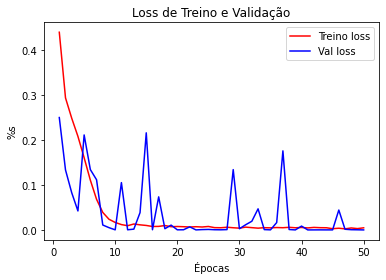

In [46]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()

# Resultados do Conjunto de Teste

In [47]:
from tensorflow import keras
model = keras.models.load_model(model_filepath)

In [48]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 3s 63ms/step - loss: 0.0212 - accuracy: 0.9938
Test accuracy: 0.994


# Referências

* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://stackoverflow.com/questions/3430372/how-do-i-get-the-full-path-of-the-current-files-directory
* https://www.geeksforgeeks.org/python-list-files-in-a-directory/
* https://pynative.com/python-random-sample/
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://www.mygreatlearning.com/blog/keras-tutorial/
* https://www.machinecurve.com/index.php/2020/03/30/how-to-use-conv2d-with-keras/
* https://www.pyimagesearch.com/2021/06/30/how-to-use-the-modelcheckpoint-callback-with-keras-and-tensorflow/